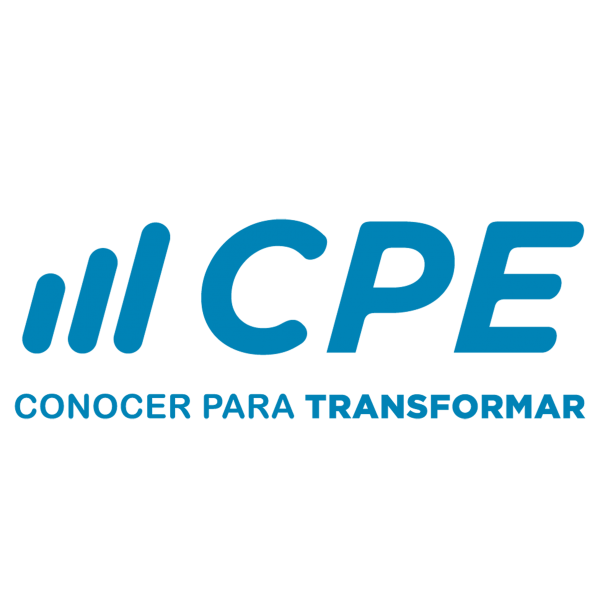

# Visualizando datos en un mapa con el paquete de Python «Folium»

Ya sabemos que Python posee multitud de librerías con las que realizar diferentes funciones y sobre todo permite mucho trabajar con datos geoespaciales y desplegar mapas, entre ellas se encuentra Folium. Google colab ya tiene de manera canonica esta libreria.

In [2]:
import folium
mapa = folium.Map(location=[-34.90528453431504, -56.18882583553827], zoom_start=100)
mapa

In [4]:
map = folium.Map(location=[-34.90528453431504, -56.18882583553827], tiles="Stamen Toner", zoom_start=15)
map

Nos dirigimos a otra ubicación y cambiamos de nuevo el mapa base:

In [ ]:
map = folium.Map(location=[-34.90528453431504, -56.18882583553827], tiles="Stamen Terrain", zoom_start=15)
map

In [ ]:
map = folium.Map(location=[-34.90528453431504, -56.18882583553827], tiles="Stamen Terrain", zoom_start=15)
map

Ejercicio:

probar diseños: ”CartoDB positron”, “CartoDB dark_matter”

In [ ]:
map = folium.Map(location=[-25.274398, 133.775136], control_scale=True)
map

Vamos a cargar un archivo en formato GeoJSON (Folium no admite shapefiles) y lo vamos a hacer desde un enlace creado por el gobierno de Australia sobre avistamientos de koalas.



Para trabajar con shapes, utilizaremos la librería GeoPandas , pero eso en una próxima entrada.

Este es el código para insertar los datos en el visor, la siguiente línea de código permite descargar el mapa en formato .html para que puedas mostrarlo en un navegador:

In [ ]:
folium.GeoJson('https://data.gov.au/geoserver/koala-records-for-twenty-years-to-2016/wfs?request=GetFeature&typeName=ckan_147a7ff0_e091_4752_9ca3_9c8707895953&outputFormat=json').add_to(map)
map.save("autralia.html")

## Ejercicio:
Cargar de una base de datos, la posición geospacial de centros de formación SENA Colombia.
Extraida de
https://www.datos.gov.co/Trabajo/Georeferenciaci-n-Centros-de-Aprendizaje-SENA/8cnh-7asj


In [ ]:
import pandas as  pd
path = "/content/Centros_SENA.csv"
df = pd.read_csv(path)

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df2 = df[['CENTRO_FORMACION','LATITUD','LONGITUD','NOMBRE_DEPARTAMENTO', 'CODIGO_REGIONAL', 'CODIGO_DEPARTAMENTO']]
df2 = df2[df2['NOMBRE_DEPARTAMENTO']=='ANTIOQUIA']
df2

In [ ]:
map_sena = folium.Map(location=[4.570868, -74.297333], control_scale=True)
map_sena

In [ ]:
#Dados de coordenadas geoespaciais
my_zip = zip(df2['LATITUD'], df2['LONGITUD'])
list_of_my_zip = list(my_zip)
list_of_my_zip

In [ ]:
from folium.plugins import HeatMap
hm_layer = HeatMap(list_of_my_zip,
                   min_opacity=0.5,
                   radius=10,
                   blur=6)

In [ ]:
hm_layer.add_to(map_sena)

In [ ]:
map_sena

In [ ]:
lat = 4.570868
lon = -74.297333

map_sena = folium.Map(location=[lat,lon], control_scale=True)
feature_group = folium.FeatureGroup("Locations")
for lat, lon, name, reg, cod  in zip(df2['LATITUD'], df2['LONGITUD'],df2['CENTRO_FORMACION'], df['CODIGO_REGIONAL'], df['CODIGO_DEPARTAMENTO']):
    feature_group.add_child(folium.Marker(location=[lat,lon],popup= str(name) + ' , ' + str(reg) +' , '+  str(cod)))

map_sena.add_child(feature_group)

In [ ]:
map_sena.save("SENA_Centros_Antioquia.html")